In [9]:
import cv2
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from random import randint

In [13]:
train_masks, train_images = sorted(glob('data/datasets/train_dataset/masks/*')), sorted(glob('data/datasets/train_dataset/images/*'))
val_masks, val_images = sorted(glob('data/datasets/val_dataset/masks/*')), sorted(glob('data/datasets/val_dataset/images/*'))

# Image vs Mask

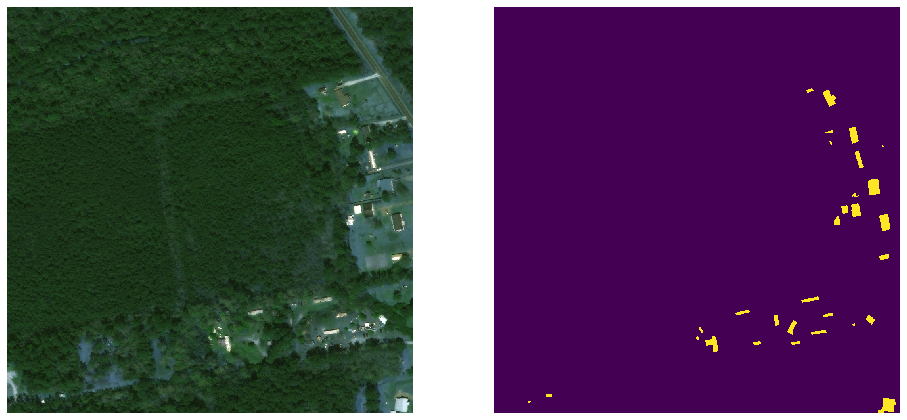

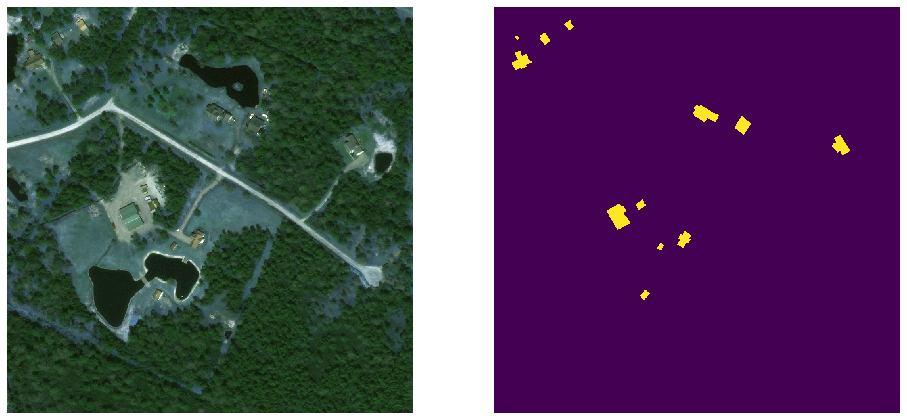

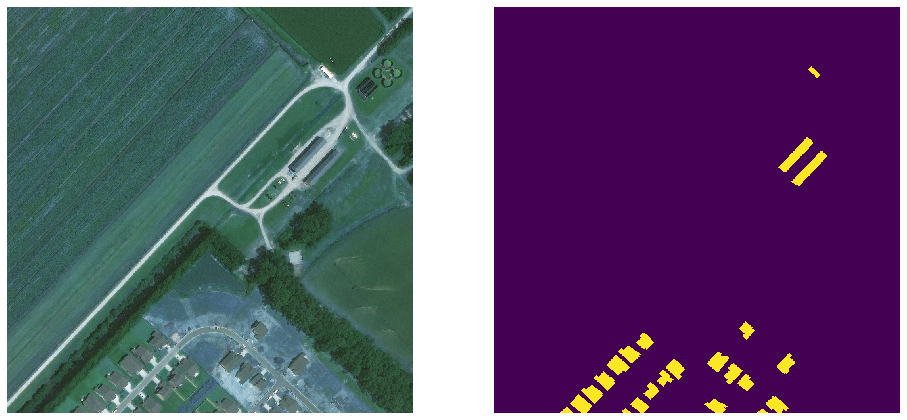

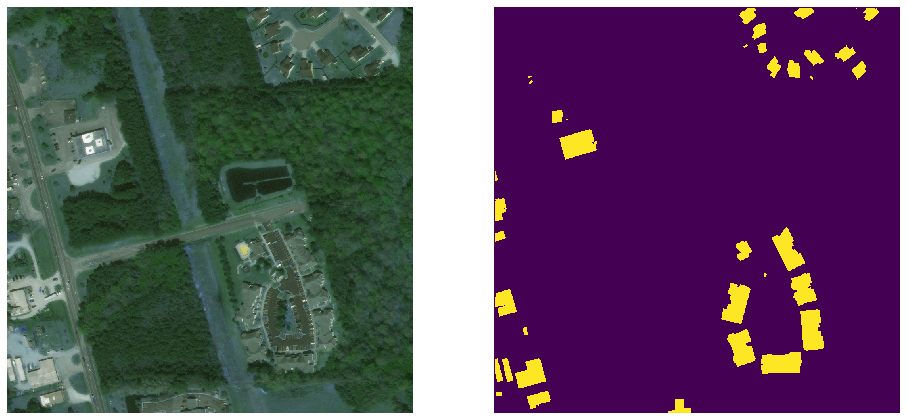

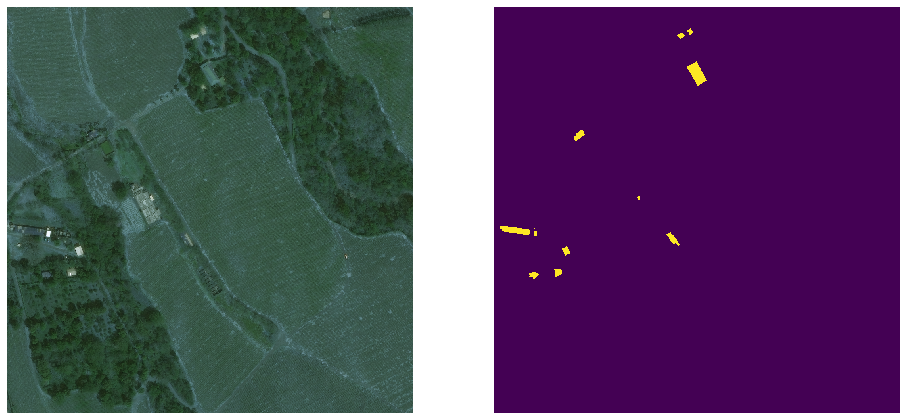

In [22]:
for i in range(5):
    gs = GridSpec(nrows=1, ncols=2)
    fig = plt.figure(figsize=(16, 8))

    idx = randint(0, len(train_images[i]))
    img, mask = cv2.imread(train_images[idx]), cv2.imread(train_masks[idx], 0)

    ax = fig.add_subplot(gs[0, 0])
    ax.imshow(img)
    plt.axis('off')

    ax = fig.add_subplot(gs[0, 1])
    ax.imshow(mask)
    plt.axis('off')

    plt.show()

# Some stats

In [25]:
def count_classes(fnames):
    c0, c1, no_build, dist_list = 0, 0, 0, []
    for fname in fnames:
        img = cv2.imread(fname, 0) // 255
        count1 = int(np.sum(img))
        c1 += count1
        c0 += 1024**2 - count1
        if count1 == 0:
            no_build += 1
        dist_list.append(100*count1/1024**2)
        
    p0, p1 = 100*c0/(len(fnames)*1024**2), 100*c1/(len(fnames)*1024**2)
    print(f"Total building pixels:       {p1:.2f}% ({c0}/{len(fnames)*1024**2})")
    print(f"Total no building: pixels:  {p0:.2f}% ({c1}/{len(fnames)*1024**2})")
    print(f"Imgages without buildings:  {100*no_build/len(fnames):.2f}% ({no_build}/{len(fnames)})")
    return dist_list

In [37]:
train_dist = count_classes(train_fnames)

Total building pixels:       2.39% (7499026261/7682916352)
Total no building: pixels:  97.61% (183890091/7682916352)
Imgages without buildings:  38.54% (2824/7327)


In [26]:
val_dist = count_classes(val_fnames)

Total building pixels:       2.48% (1882562483/1930428416)
Total no building: pixels:  97.52% (47865933/1930428416)
Imgages without buildings:  37.10% (683/1841)


# Building pixels per image distribution

Max buildings density 61.74%


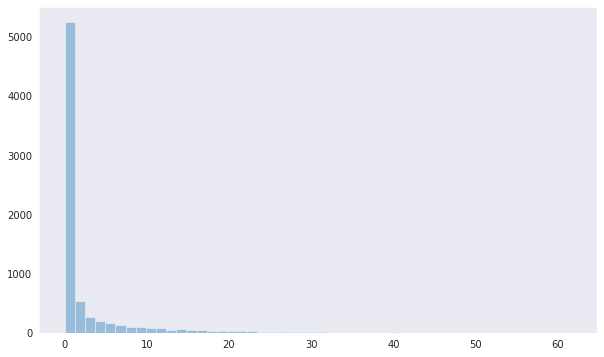

In [148]:
print(f"Max buildings density {max(train_dist):.2f}%")
plt.figure(figsize=(10,6))
sns.distplot(train_dist, kde=False);

Max building density 49.96%


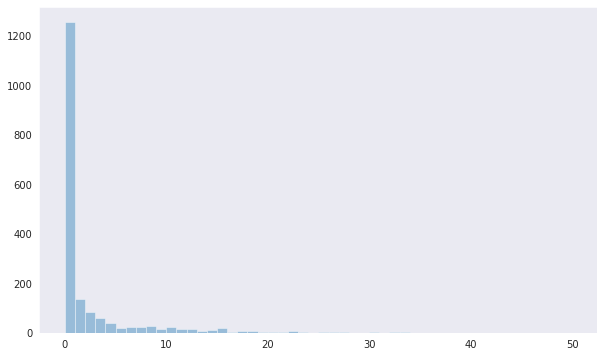

In [147]:
print(f"Max building density {max(val_dist):.2f}%")
plt.figure(figsize=(10,6))
sns.distplot(val_dist, kde=False);

# Cropping visualization

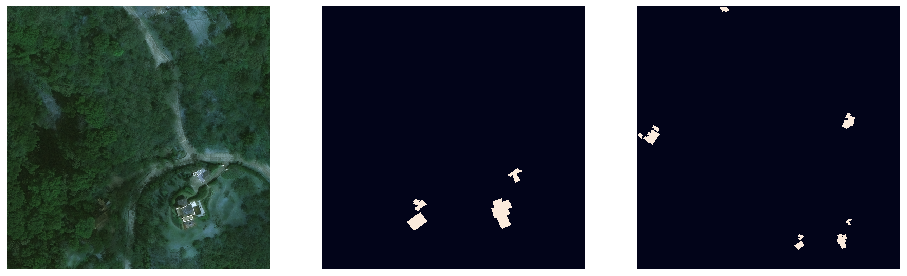

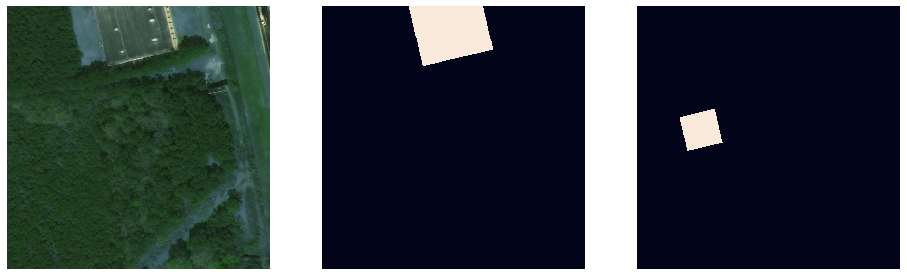

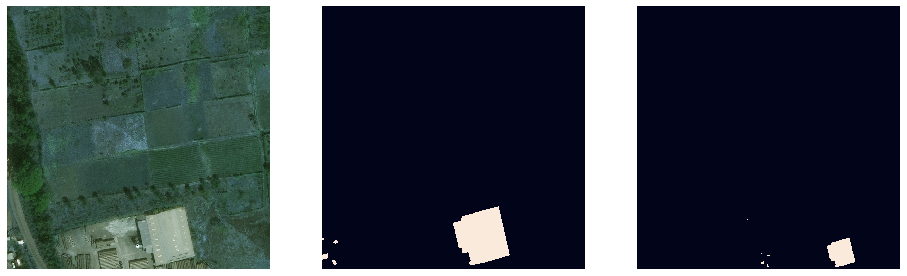

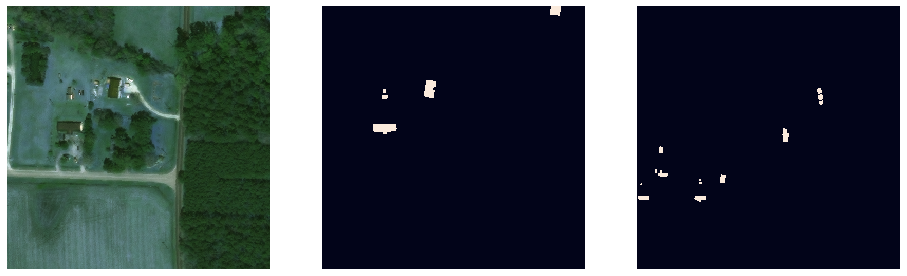

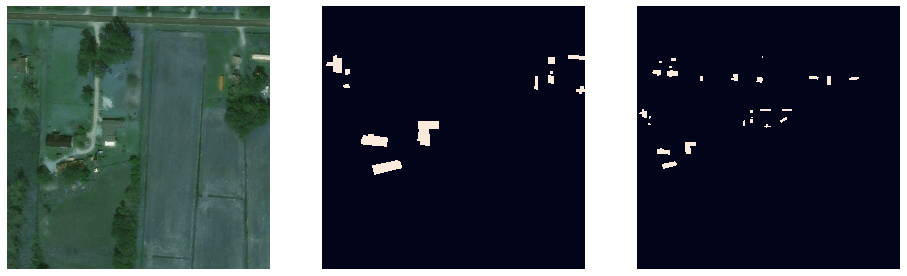

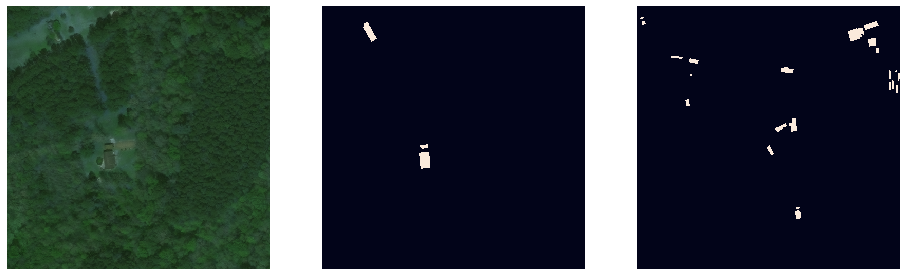

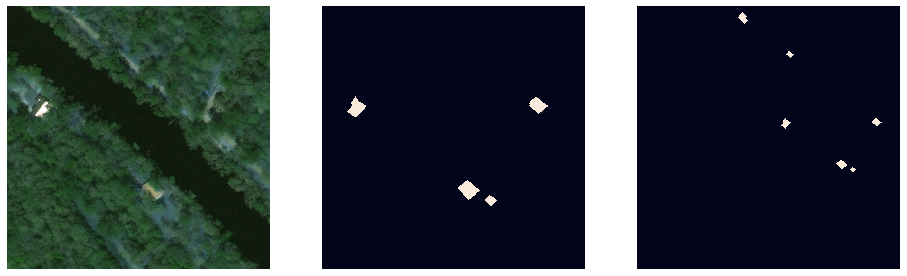

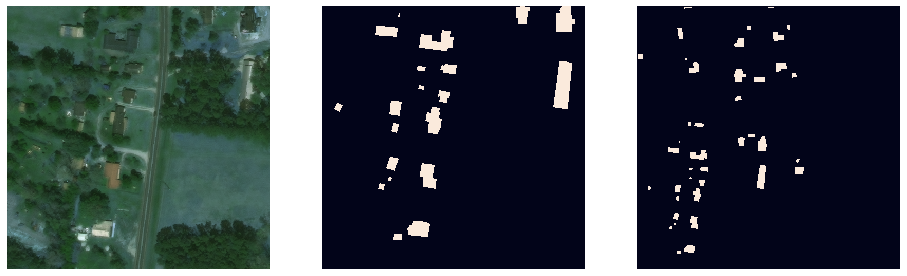

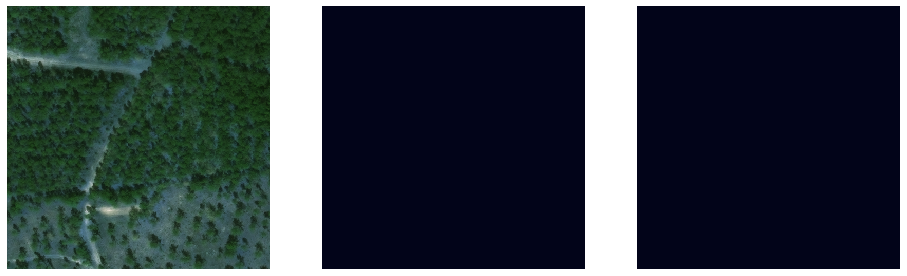

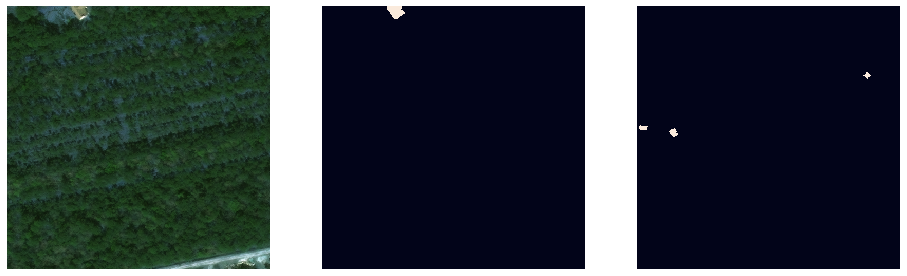

In [103]:
from albumentations import (
    CropNonEmptyMaskIfExists,
    MaskDropout
)

augment = CropNonEmptyMaskIfExists(512, 512, p=1)
for i in range(10):
    gs = GridSpec(nrows=1, ncols=3)
    fig = plt.figure(figsize=(16, 8))

    idx = randint(0, len(train_images[i]))
    img, mask = cv2.imread(train_images[idx]), cv2.imread(train_masks[idx], 0)
    aug = augment(image=img, mask=mask)

    ax = fig.add_subplot(gs[0, 0])
    ax.imshow(aug['image'])
    plt.axis('off')
    
    ax = fig.add_subplot(gs[0, 1])
    ax.imshow(aug['mask'])
    plt.axis('off')
    
    ax = fig.add_subplot(gs[0, 2])
    ax.imshow(mask)
    plt.axis('off')

    plt.show()

# Tensor flipping

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


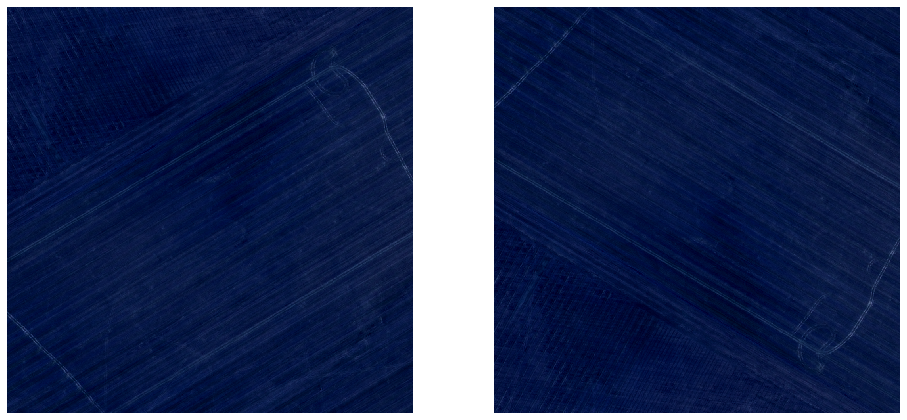

In [142]:
# axis 3 - horizontal flip, 2 - vertical flip
import models.data_loader as data_loader
val_loader = data_loader.fetch_dataloader("data/datasets/val_dataset", 1, 'Validation')
gs = GridSpec(nrows=1, ncols=2)
fig = plt.figure(figsize=(16, 8))
for i, (X, y_true) in enumerate(val_loader):
    flip=torch.flip(X, [2])
    
    ax = fig.add_subplot(gs[0, 0])
    ax.imshow(flip[0].permute(1, 2, 0))
    plt.axis('off')
    
    ax = fig.add_subplot(gs[0, 1])
    ax.imshow(X[0].permute(1, 2, 0))
    plt.axis('off')
    
    plt.show()
    break